#### DSC 680
#### Inman, Gracie
#### Project 1
#### 03/31/24

In [1]:
# load data
import pandas as pd
credit_risk_df = pd.read_csv("credit_risk_dataset.csv")
credit_risk_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
# check columns
credit_risk_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [3]:
# drop unneed columns
credit_risk = credit_risk_df.drop(["loan_grade", "loan_int_rate"], axis = 1)
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,1,0.55,Y,4


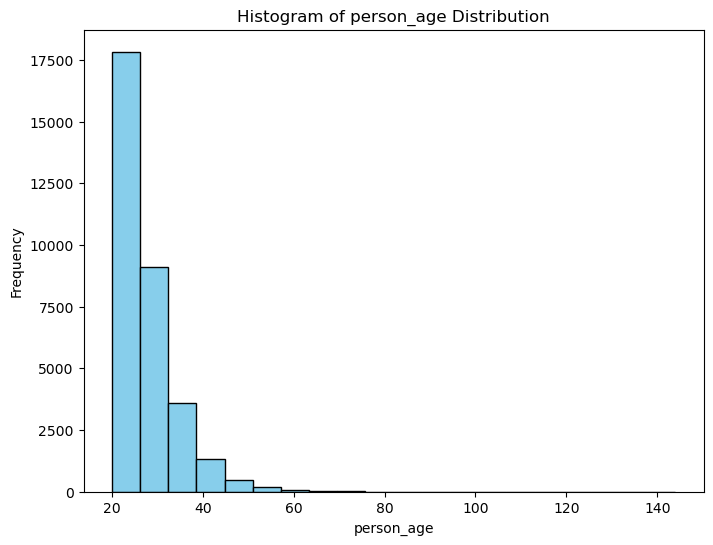

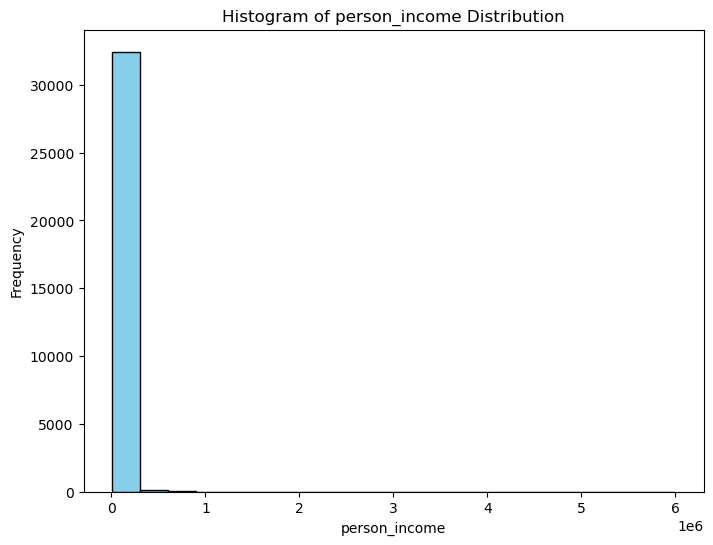

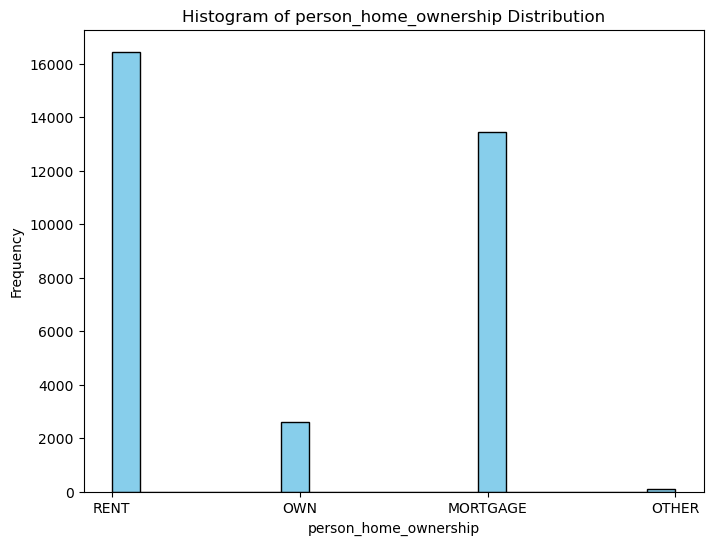

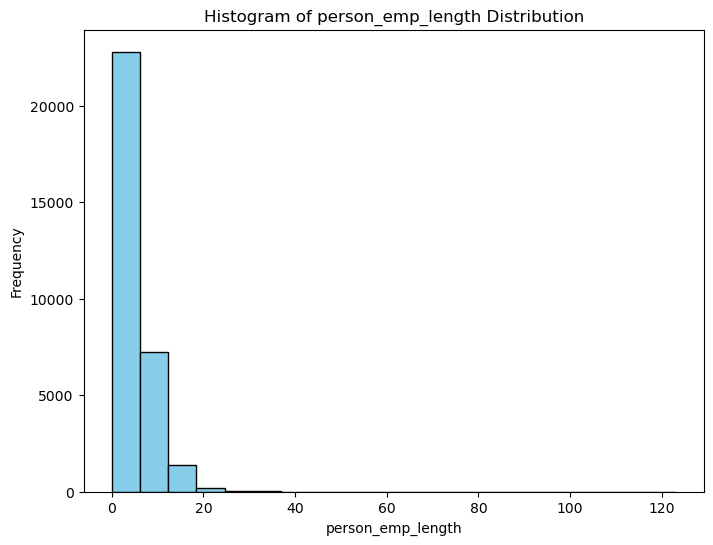

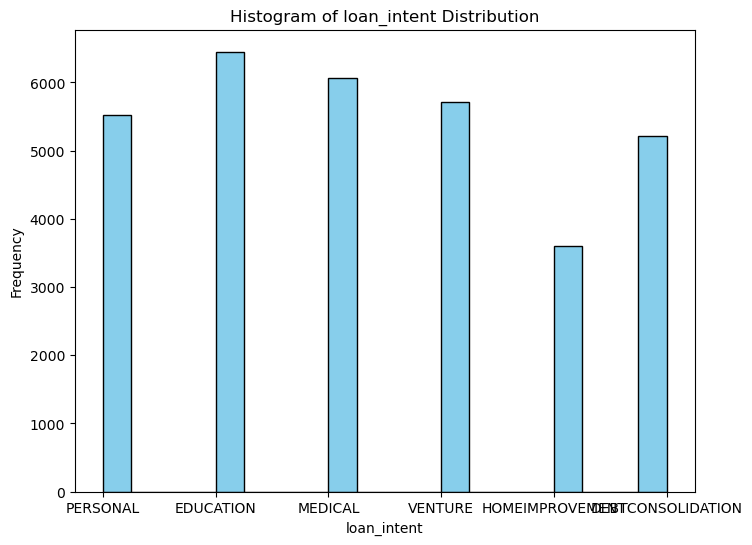

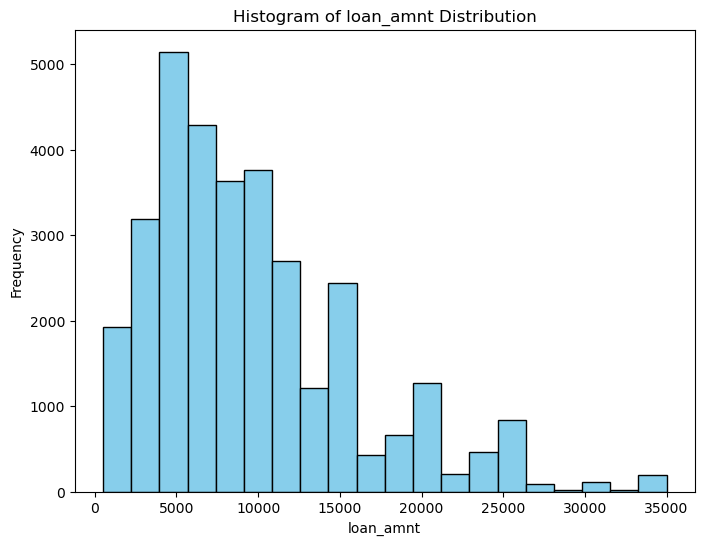

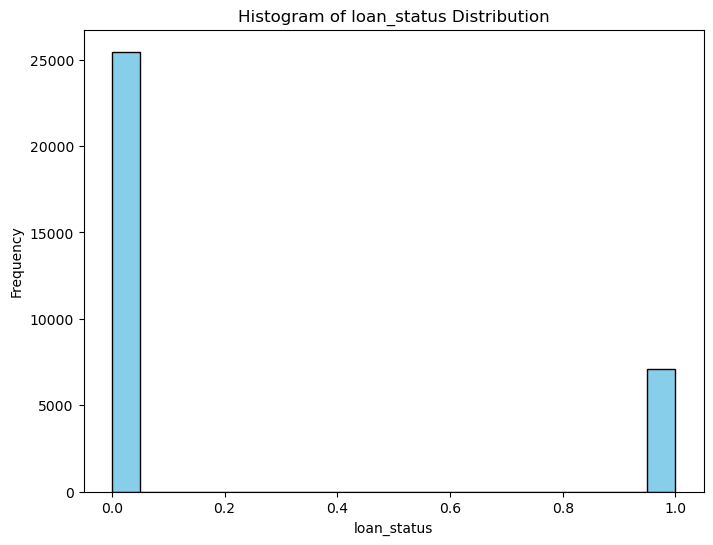

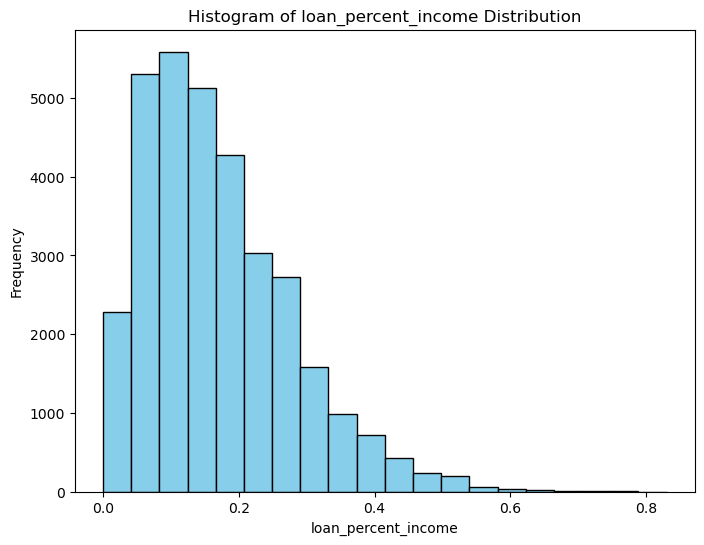

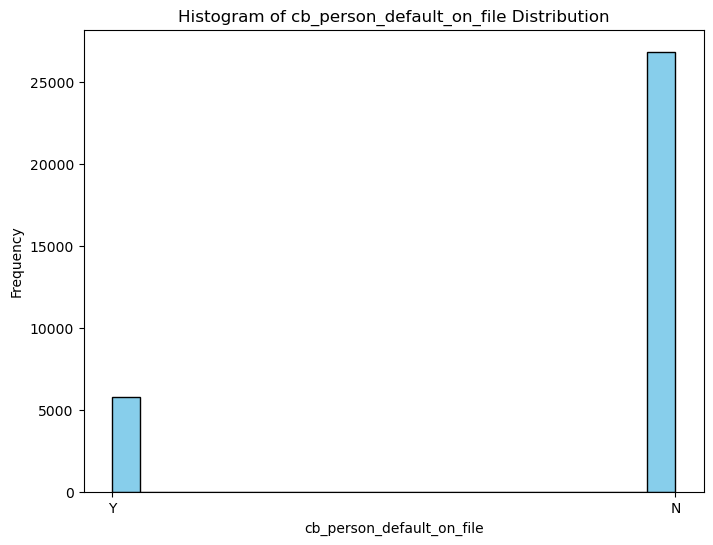

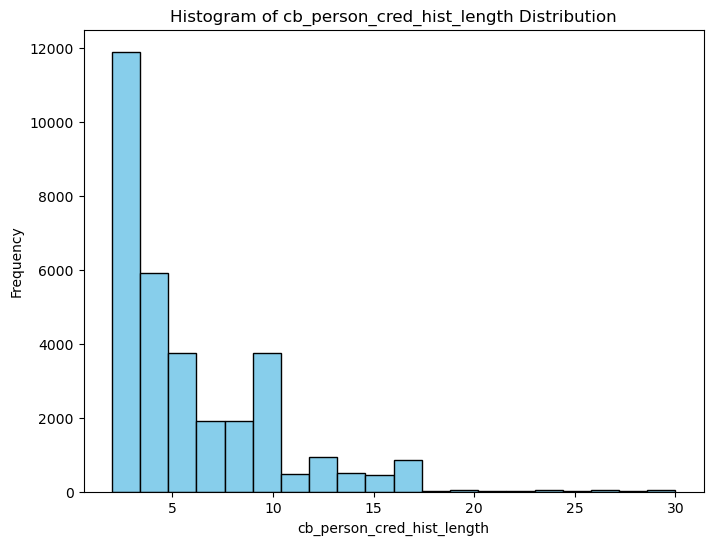

In [4]:
# visualize columns
import matplotlib.pyplot as plt
import pandas as pd
for column in credit_risk.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(credit_risk[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} Distribution')
    plt.show()

In [5]:
# Check columns values
for column in credit_risk.columns:
    unique_values = credit_risk[column].unique()
    print(f"Unique values for '{column}':")
    print(unique_values)
    print()

Unique values for 'person_age':
[ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67]

Unique values for 'person_income':
[  59000    9600   65500 ...  720000 1900000    4888]

Unique values for 'person_home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Unique values for 'person_emp_length':
[123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  nan  11.
  18.  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.
  25.  27.  28.  31.  41.  34.  29.  38.  30.]

Unique values for 'loan_intent':
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Unique values for 'loan_amnt':
[35000  1000  5500  2500  1600  4500 30000  1750 34800 34000  1500 33950
 33000  4575  1400 32500  4000  2000 32000 31050 24250  7800 20000 10000
 25000 18000 12000 29100 28000  9600  

In [6]:
credit_risk.shape

(32581, 10)

In [7]:
# Check for missing values
missing_values = credit_risk.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_amnt                       0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64


In [8]:
credit_risk = credit_risk.dropna()
print("Shape of cleaned dataset:", credit_risk.shape)

Shape of cleaned dataset: (31686, 10)


In [9]:
# Encode Categorical Values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

credit_risk['person_home_ownership_encoded'] = label_encoder.fit_transform(credit_risk['person_home_ownership'])

# Print mapping
print("Mapping of encoded labels:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")

# Check data
print("\nFirst few rows of the dataset with encoded 'person_home_ownership':")
print(credit_risk[['person_home_ownership', 'person_home_ownership_encoded']].head())

Mapping of encoded labels:
MORTGAGE: 0
OTHER: 1
OWN: 2
RENT: 3

First few rows of the dataset with encoded 'person_home_ownership':
  person_home_ownership  person_home_ownership_encoded
0                  RENT                              3
1                   OWN                              2
2              MORTGAGE                              0
3                  RENT                              3
4                  RENT                              3


In [10]:
credit_risk['cb_person_default_on_file_encoded'] = label_encoder.fit_transform(credit_risk['cb_person_default_on_file'])

# Print mapping
print("Mapping of encoded labels:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")

# Check
print("\nFirst few rows of the dataset with encoded 'cb_person_default_on_file':")
print(credit_risk[['cb_person_default_on_file', 'cb_person_default_on_file_encoded']].head())

Mapping of encoded labels:
N: 0
Y: 1

First few rows of the dataset with encoded 'cb_person_default_on_file':
  cb_person_default_on_file  cb_person_default_on_file_encoded
0                         Y                                  1
1                         N                                  0
2                         N                                  0
3                         N                                  0
4                         Y                                  1


In [11]:
credit_risk['loan_intent_encoded'] = label_encoder.fit_transform(credit_risk['loan_intent'])

# Print mapping
print("Mapping of encoded labels:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")

# Check
print("\nFirst few rows of the dataset with encoded 'loan_intent':")
print(credit_risk[['loan_intent', 'loan_intent_encoded']].head())

Mapping of encoded labels:
DEBTCONSOLIDATION: 0
EDUCATION: 1
HOMEIMPROVEMENT: 2
MEDICAL: 3
PERSONAL: 4
VENTURE: 5

First few rows of the dataset with encoded 'loan_intent':
  loan_intent  loan_intent_encoded
0    PERSONAL                    4
1   EDUCATION                    1
2     MEDICAL                    3
3     MEDICAL                    3
4     MEDICAL                    3


In [12]:
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_encoded,cb_person_default_on_file_encoded,loan_intent_encoded
0,22,59000,RENT,123.0,PERSONAL,35000,1,0.59,Y,3,3,1,4
1,21,9600,OWN,5.0,EDUCATION,1000,0,0.10,N,2,2,0,1
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,1,0.57,N,3,0,0,3
3,23,65500,RENT,4.0,MEDICAL,35000,1,0.53,N,2,3,0,3
4,24,54400,RENT,8.0,MEDICAL,35000,1,0.55,Y,4,3,1,3


In [13]:
credit_risk_encoded = credit_risk.drop(['person_home_ownership', 'cb_person_default_on_file', 'loan_intent'], axis=1)
credit_risk_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_encoded,cb_person_default_on_file_encoded,loan_intent_encoded
0,22,59000,123.0,35000,1,0.59,3,3,1,4
1,21,9600,5.0,1000,0,0.10,2,2,0,1
2,25,9600,1.0,5500,1,0.57,3,0,0,3
3,23,65500,4.0,35000,1,0.53,2,3,0,3
4,24,54400,8.0,35000,1,0.55,4,3,1,3


In [14]:
# split data
from sklearn.model_selection import train_test_split

X = credit_risk_encoded.drop('loan_status', axis=1) 
y = credit_risk_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Shapes of training and test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (22180, 9)
Shape of X_test: (9506, 9)
Shape of y_train: (22180,)
Shape of y_test: (9506,)


In [15]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
naive_bayes = GaussianNB()

# Train
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)


GaussianNB()

In [16]:
# evaluate
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
# dictionary
results = {}

# Logistic regression
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions)
logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_predictions)
results['Logistic Regression'] = {'Accuracy': logistic_regression_accuracy,
                                  'Precision': logistic_regression_precision,
                                  'Confusion Matrix': logistic_regression_confusion_matrix}

In [17]:
# random forest
random_forest_predictions = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_predictions)
results['Random Forest'] = {'Accuracy': random_forest_accuracy,
                            'Precision': random_forest_precision,
                            'Confusion Matrix': random_forest_confusion_matrix}

In [18]:
# Naive Bayes
naive_bayes_predictions = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
naive_bayes_precision = precision_score(y_test, naive_bayes_predictions)
naive_bayes_confusion_matrix = confusion_matrix(y_test, naive_bayes_predictions)
results['Naïve Bayes'] = {'Accuracy': naive_bayes_accuracy,
                          'Precision': naive_bayes_precision,
                          'Confusion Matrix': naive_bayes_confusion_matrix}


In [19]:
for model, metrics in results.items():
    print(f" {model}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print()

 Logistic Regression:
Accuracy: 0.8116
Precision: 0.7390
Confusion Matrix:
[[7378  119]
 [1672  337]]

 Random Forest:
Accuracy: 0.8876
Precision: 0.8841
Confusion Matrix:
[[7355  142]
 [ 926 1083]]

 Naïve Bayes:
Accuracy: 0.8004
Precision: 0.6217
Confusion Matrix:
[[7323  174]
 [1723  286]]



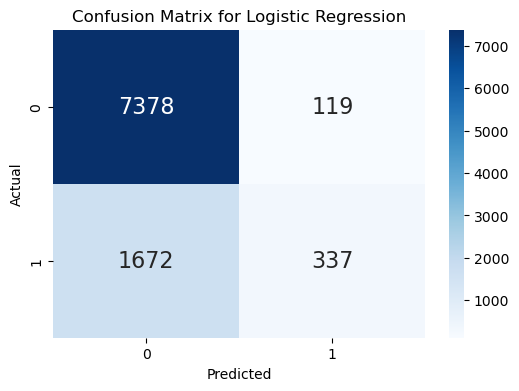

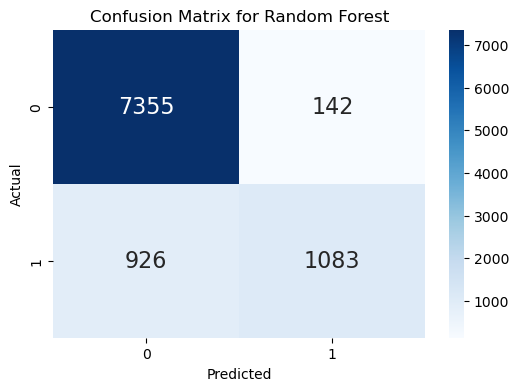

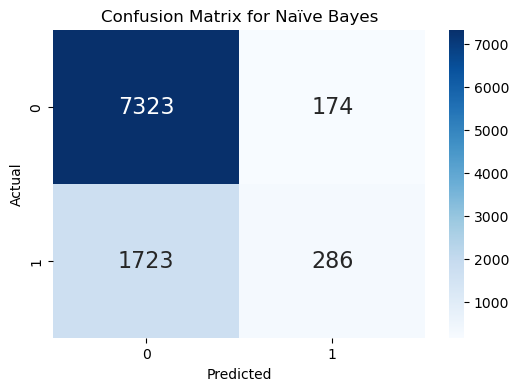

In [20]:
import seaborn as sns
for model, metrics in results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})
    plt.title(f'Confusion Matrix for {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

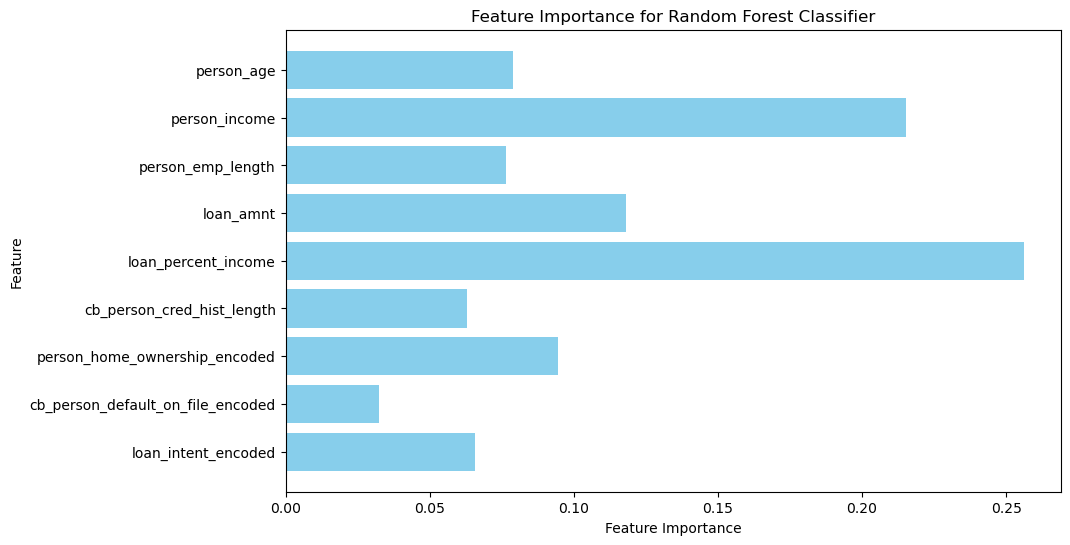

In [21]:
feature_importances = random_forest.feature_importances_

# Features
feature_names = X.columns

# Bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Classifier')
plt.gca().invert_yaxis()  
plt.show()

In [22]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost 
adaboost_random_forest = AdaBoostClassifier(base_estimator=random_forest)

# Train AdaBoost
adaboost_random_forest.fit(X_train, y_train)

# Evaluate 
adaboost_random_forest_accuracy = adaboost_random_forest.score(X_test, y_test)
adaboost_random_forest_predictions = adaboost_random_forest.predict(X_test)
adaboost_random_forest_precision = precision_score(y_test, adaboost_random_forest_predictions)
adaboost_random_forest_confusion_matrix = confusion_matrix(y_test, adaboost_random_forest_predictions)

# Print
print("Metrics for AdaBoost with Random Forest:")
print(f"Accuracy: {adaboost_random_forest_accuracy:.4f}")
print(f"Precision: {adaboost_random_forest_precision:.4f}")
print("Confusion Matrix:")
print(adaboost_random_forest_confusion_matrix)


/Users/gracieinman/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Metrics for AdaBoost with Random Forest:
Accuracy: 0.8772
Precision: 0.9033
Confusion Matrix:
[[7396  101]
 [1066  943]]
